# 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv('AdidasSalesDatasets.csv')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


# 데이터 전처리
- null 없음.

- 데이터타입 변환
Retailer ID  -> 문자 (숫자로 저장되어있기는 한데, 아이디이므로 연산이 필요없음.)
Invoice Date	-> 날짜
7   Price per Unit    9648 non-null   object    여기는 모두 숫자로.
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object


### 1) 문자를 숫자 형태로 변환
정규식을 활용하여 변환함. 가격, 매출, 컬럼에 %, $ , ','포함

정규표현식을 사용
df['Price per Unit'].str.replace('[\W]','',regex=True)
\W는 숫자, 문자를 제외한 나머지(특수문자)를 의미
df['Price per Unit'].str.replace('[%$,]','',regex=True)

In [5]:
df.columns


Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [6]:
df['Price per Unit'] = df['Price per Unit'].str.replace('[$%,]','',regex=True).astype('float')
df['Units Sold'] = df['Units Sold'].str.replace('[$%,]','',regex=True).astype('float')
df['Total Sales'] = df['Total Sales'].str.replace('[$%,]','',regex=True).astype('float')
df['Operating Profit'] = df['Operating Profit'].str.replace('[$%,]','',regex=True).astype('float')
df['Operating Margin'] = df['Operating Margin'].str.replace('[$%,]','',regex=True).astype('float')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   float64
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 980.0+ KB


In [8]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28.0,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32.0,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37.0,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42.0,Outlet


In [9]:
df['Operating_Margin_rate'] = df['Operating Margin'] * 0.01

In [10]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28.0,Outlet,0.28
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32.0,Outlet,0.32
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37.0,Outlet,0.37
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42.0,Outlet,0.42


## 시간 데이터 다루기
- yyyy-mm-dd 형태의 문제를 pandas의 datetime으로 변환

'%Y-%m-%d'
- 20240101 이라면?
'%Y%m%d'
 
 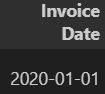

In [11]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%Y-%m-%d')
df['Invoice Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9648 entries, 0 to 9647
Series name: Invoice Date
Non-Null Count  Dtype         
--------------  -----         
9648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 75.5 KB


In [12]:
df['year']  = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28.0,Outlet,0.28,2021,1
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32.0,Outlet,0.32,2021,1
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37.0,Outlet,0.37,2021,2
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42.0,Outlet,0.42,2021,2


## 3) 문자를 숫자로 변환

In [13]:
df['Retailer ID'] = df['Retailer ID'].astype('string')
df['Retailer ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9648 entries, 0 to 9647
Series name: Retailer ID
Non-Null Count  Dtype 
--------------  ----- 
9648 non-null   string
dtypes: string(1)
memory usage: 75.5 KB


## 4) 결측치 처리

In [14]:
df.isnull().sum()  # 없음 

Retailer                 0
Retailer ID              0
Invoice Date             0
Region                   0
State                    0
City                     0
Product                  0
Price per Unit           0
Units Sold               0
Total Sales              0
Operating Profit         0
Operating Margin         0
Sales Method             0
Operating_Margin_rate    0
year                     0
month                    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

# 분석
## 월별 판매량

In [16]:
df.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating_Margin_rate,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.454799


<Axes: xlabel='month,year'>

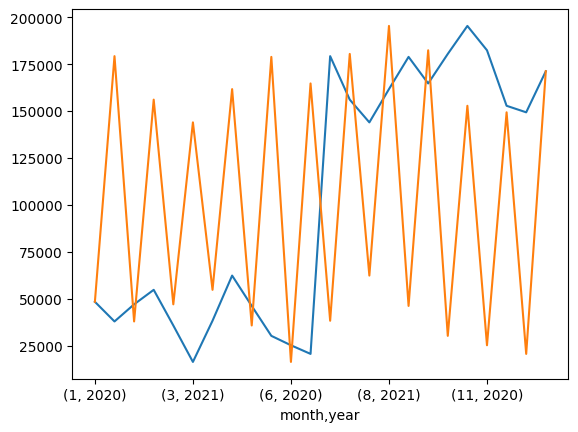

In [17]:

df.groupby(['year','month'])['Units Sold'].sum().plot.line()
df.groupby(['month','year'])['Units Sold'].sum().plot.line()

In [18]:
# 피벗
df.pivot_table(index = 'year', columns= 'month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


In [19]:
# 피벗
## 소매업체별
df.pivot_table(index = ['year', 'month'], columns= 'Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

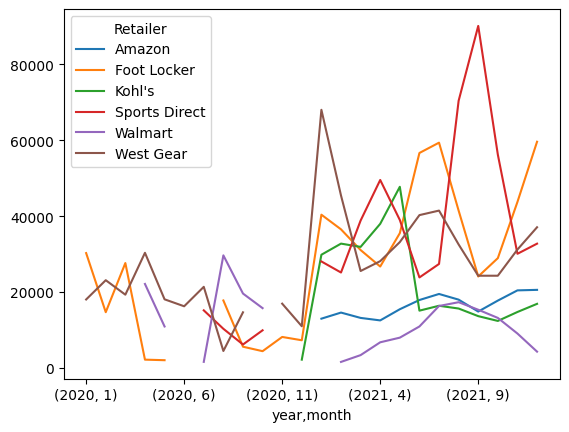

In [20]:

df.pivot_table(index = ['year', 'month'], columns= 'Retailer', values='Units Sold', aggfunc='sum').plot.line()

- 2020년까지 판매량이 저조하다, 21년 들어 전반적으로 판매량이 늘어남
데이터를 좀 더 자세히 살펴봐야 함.

In [21]:
df[['Retailer','Retailer ID']].drop_duplicates().sort_values('Retailer')

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


In [22]:
df_r = df[['Retailer','Retailer ID', 'year', 'month']].drop_duplicates().sort_values('Retailer')
df_r

,Retailer,Retailer ID,year,month
1225,Amazon,1185732,2021,2
1261,Amazon,1185732,2021,8
1148,Amazon,1185732,2021,10
1168,Amazon,1185732,2021,11
1189,Amazon,1185732,2021,12
...,...,...,...,...
558,West Gear,1128299,2020,3
1923,West Gear,1128299,2021,11
1917,West Gear,1128299,2021,10
1905,West Gear,1128299,2021,8


In [23]:
df_r.pivot_table(index = ['year','month'], values = 'Retailer ID', aggfunc = 'count')
# 매장수가 많이 늘었다.

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

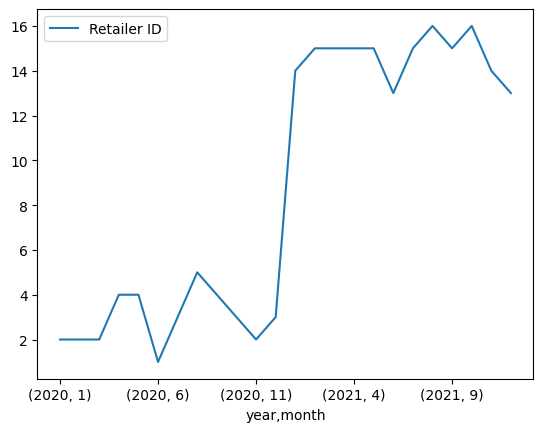

In [24]:
df_r.pivot_table(index = ['year','month'], values = 'Retailer ID', aggfunc = 'count').plot.line()

<Axes: xlabel='year,month'>

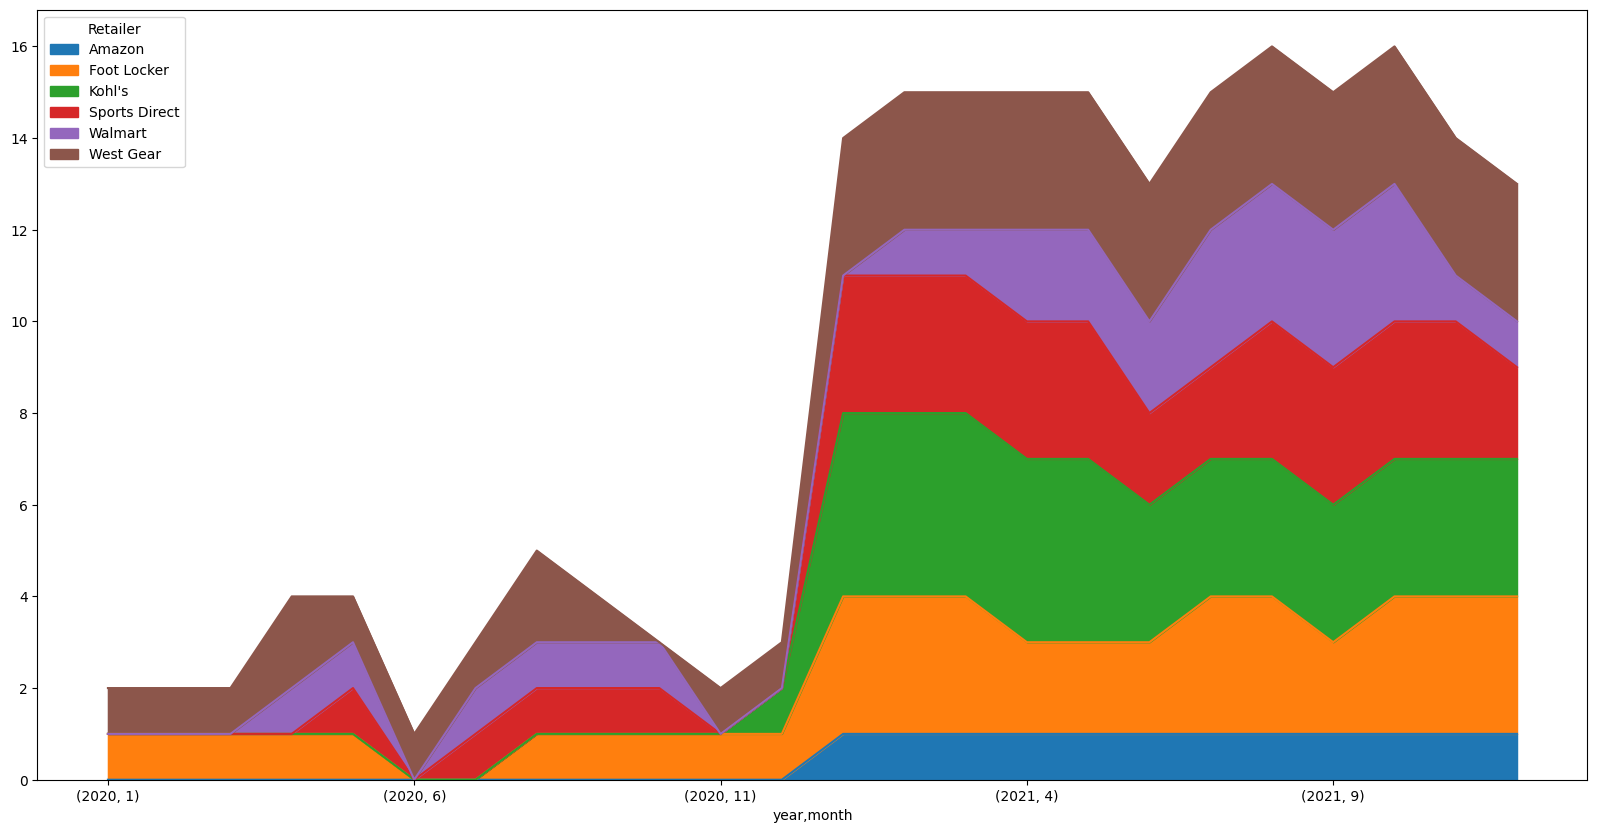

In [25]:
df_r.pivot_table(index = ['year','month'], columns= 'Retailer', values = 'Retailer ID', aggfunc = 'count').plot(kind='area', figsize = (20,10))

 - 코로나로 인해 20년까지 매출이 저조하다 21년부터 늘어났을 것으로 판단
 - (외부데이터 등 활용, 접목)
 

In [28]:
#df 피클로 저장 후 lecture 02 에서 시작
pd.to_pickle(df, 'pkl_lecture01_df.pkl')